In [174]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [175]:
#Importing all images
list = []

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Felipe\\random_test') if isfile(join('C:\\Users\\Felipe\\random_test', f))]

for img in onlyfiles:
    list.append('C:\\Users\\Felipe\\random_test\\'+img)

    
img_data = []    
for img in list:
    try:
        img_array = cv2.imread(img)
        #img_array = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)     
        img_data.append(img_array)
    except Exception as e:
        pass


In [176]:
img

'C:\\Users\\Felipe\\random_test\\Zuo2013201-Figure1-1.png'

In [177]:
name = img[img.rindex('\\')+1:]
name

'Zuo2013201-Figure1-1.png'

In [178]:
print(len(img_data))
print(len(list))

455
455


In [179]:
#img_path='C:\\Users\\Felipe\\linear\\noncompound\\Rajendran201861-Figure15-1.png'

In [180]:
#img_path = list[random.randint(0, 455)]

In [181]:
#img_path

(300, 366, 3)


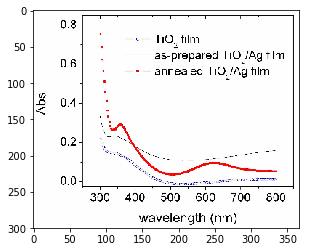

In [182]:
#Cargando la imagen

#img_array = cv2.imread(img_path, 0)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
#img_path = img_random
img_array = cv2.imread(img)
img_original = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
print(img_array.shape)

#plt.imshow(img_array, cmap = 'gray')
plt.imshow(img_original) # graph it
plt.show()

60
60
52.30054644808743


Text(0, 0.5, 'Promedio de los valores de esa fila')

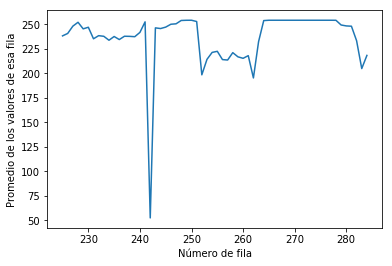

In [183]:
#Código para detectar dónde está el eje X (la línea del eje X)

#La mitad de la gráfica para abajo (de 187 a 374)
end = int(img_array.shape[0] - img_array.shape[0]*0.05)
height = img_array.shape[0]
half_height = int(3*height/4)

means = []
file = []
for i in range(half_height, end):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


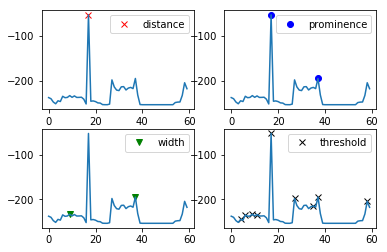

In [184]:
#Gráfico de la matriz inversa, para detectar los puntos más altos

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

meansnp = np.array(means)
meansnp = meansnp*-1

#x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
peaks, _ = find_peaks(meansnp, distance=60)
peaks2_x, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2_x, meansnp[peaks2_x], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [185]:
#Sistema de calificación de cada punto

if peaks2_x.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index_x = []
    anomalies_x = meansnp[peaks2_x]*-1
    for i in anomalies_x:
        index_x.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_x)

    puntajes_altura = []
    for i in anomalies_x:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_x.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    ejex = dict[anomalies_x[indice]]
        
if peaks2_x.shape[0] == 1: 
    ejex = dict[linea]
    
if peaks2_x.shape[0] == 0:
    ejex = dict[linea]

In [186]:
ejex

242

73
73
90.19333333333333
La línea está ubicada en la columna: 68
Analizar hasta: 67


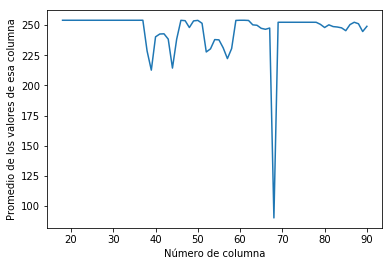

In [187]:
#Código para detectar dónde está el eje Y (la línea del eje Y)

#Establecer desde la izquierda de la imagen hasta el centro de la imagen
width = img_array.shape[1]
end = int(width/4)

start = int(img_array.shape[1] - img_array.shape[1]*0.95)
means_2 = []
col_2 = []

for i in range(start, end):
    
    calc = np.mean(img_array[:,i])
    means_2.append(calc)
    col_2.append(i)
    
    
dict_2 = {}
for key, value in zip(means_2, col_2):
    dict_2[key] = value
    
print(len(means_2))
print(len(col_2))
linea = min(means_2)
print(linea)
columna = dict_2[linea]


plt.plot(col_2, means_2)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

print("La línea está ubicada en la columna: " + str(columna))
print("Analizar hasta: " + str(columna-1))

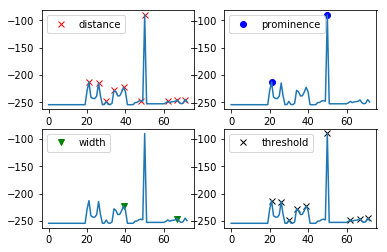

In [188]:
#Gráfico de la matriz inversa, para detectar los puntos más altos
meansnp = np.array(means_2)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [189]:
#Otro enfoque diferente al sistema de calificación: escoger solamente el mayor valor de la matriz inversa

if peaks2.shape[0] == 0:
    columna = columna


if peaks2.shape[0] > 1:
    index = []
    anomalies = meansnp[peaks2]*-1
    for i in anomalies:
        index.append(dict_2[i])

    new_valor = max(index)
    columna = new_valor
    
    
if peaks2.shape[0] == 1:
    columna = columna

122
122


Text(0, 0.5, 'Promedio de los valores de esa columna')

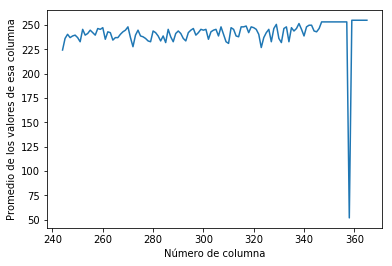

In [190]:
#Código para detectar dónde está el borde derecho de la imagen (si tiene)
#Establecer desde la derecha de la imagen hasta el centro de la imagen

img_array = cv2.imread(img)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

width = img_array.shape[1]
half_width = int(2*width/3)

end = int(width*0.95)
means_3 = []
file_3 = []

for i in range(half_width, width):
    
    calc = np.mean(img_array[:,i])
    means_3.append(calc)
    file_3.append(i)
    
    
dict_3 = {}
for key, value in zip(means_3, file_3):
    dict_3[key] = value
    
print(len(means_3))
print(len(file_3))
linea_3 = min(means_3)


plt.plot(file_3, means_3)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

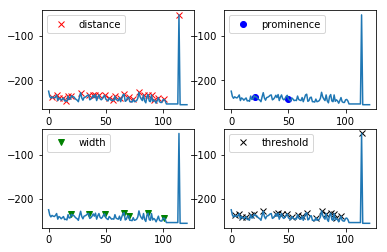

In [191]:
#Graficación de la matriz inversa

meansnp = np.array(means_3)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2_der, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [192]:
#Sistema de calificación

if peaks2_der.shape[0] == 0:
    
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]
        
if peaks2_der.shape[0] > 1:


    #El borde de la derecha se llama columna_derecha
    index_der = []
    anomalies_der = meansnp[peaks2_der]*-1
    for i in anomalies_der:
        index_der.append(dict_3[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_der)

    puntajes_altura = []
    for i in anomalies_der:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_der.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    columna_derecha = dict_3[anomalies_der[indice]]
        
if peaks2_der.shape[0] == 1: 
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]

97
97
45.07575757575758


Text(0, 0.5, 'Promedio de los valores de esa fila')

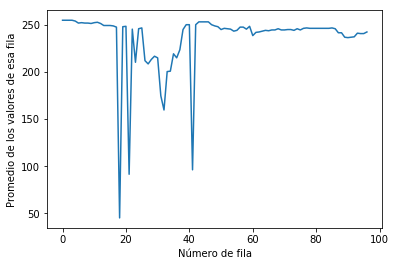

In [193]:
#Código para detectar dónde está el eje superior (si lo hay)

#La mitad de la gráfica para arriba
img_array = cv2.imread(img_path)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

height = img_array.shape[0]
half_height = int(1*height/4)

start = int(height*0.03)
means = []
file = []
for i in range(0, half_height):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')



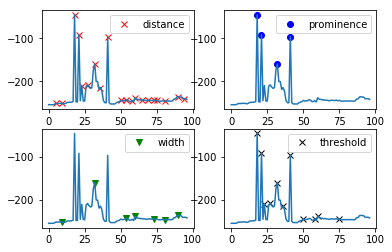

In [194]:
#Graficación de matriz inversa

meansnp = np.array(means)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [195]:
#Sistema de calificación

if peaks2.shape[0] == 0:
    
    if linea > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]
        

if peaks2.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index = []
    anomalies = meansnp[peaks2]*-1
    for i in anomalies:
        index.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies)

    puntajes_altura = []
    for i in anomalies:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    minimo_pos = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (minimo_pos/i)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    fila_arriba = dict[anomalies[indice]]
        
if peaks2.shape[0] == 1: 
    if linea_3 > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]

(300, 366, 3)


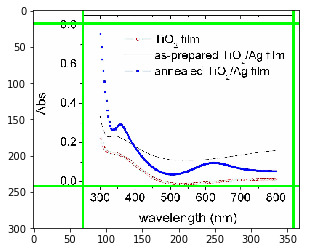

In [196]:
#Graficación de ejes
img_array = cv2.imread(img)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
print(img_array.shape)

#El orden es (columna, fila)

#Graficación del eje X
cv2.line(img_array, (0,ejex), (img_array.shape[1],ejex), (0, 255, 0), 2)

#Graficación del eje Y
cv2.line(img_array, (columna,0), (columna,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde derecho

cv2.line(img_array, (columna_derecha,0), (columna_derecha,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde superior

cv2.line(img_array, (0,fila_arriba), (img_array.shape[1],fila_arriba), (0, 255, 0), 2)
    
plt.imshow(img_array)
plt.show()

In [197]:
#Los colores se muestran en RGB
import extcolors
colors, pixel_count = extcolors.extract(img)

colors_list = []
for i in range(0, len(colors)):
    
    color = colors[i][0]
    colors_list.append(color)

In [198]:
low_ranges = []
c = 40

for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] - c
    color2 = colors_list[h][1] - c
    color3 = colors_list[h][2] - c
    
    if color1 < 0:
        color1 = 0
    if color2 < 0:
        color2 = 0
    if color3 < 0:
        color3 = 0
    
    low_ranges.append([color1, color2, color3])
    
upper_ranges = []
    
for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] + c
    color2 = colors_list[h][1] + c
    color3 = colors_list[h][2] + c
    
    if color1 > 255:
        color1 = 255
    if color2 > 255:
        color2 =255
    if color3 > 255:
        color3 = 255
    
    upper_ranges.append([color1, color2, color3])    
    
    
low_ranges

[[214, 214, 214],
 [0, 0, 0],
 [0, 0, 0],
 [215, 0, 0],
 [0, 0, 128],
 [115, 8, 9],
 [48, 48, 48],
 [0, 0, 119],
 [58, 47, 174],
 [179, 0, 0]]

In [199]:
boundaries = []
for i in range(0, len(low_ranges)):
    boundaries.append((low_ranges[i], upper_ranges[i]))
boundaries

[([214, 214, 214], [255, 255, 255]),
 ([0, 0, 0], [41, 41, 41]),
 ([0, 0, 0], [59, 59, 59]),
 ([215, 0, 0], [255, 44, 43]),
 ([0, 0, 128], [73, 69, 208]),
 ([115, 8, 9], [195, 88, 89]),
 ([48, 48, 48], [128, 128, 128]),
 ([0, 0, 119], [40, 40, 199]),
 ([58, 47, 174], [138, 127, 254]),
 ([179, 0, 0], [255, 48, 62])]

In [200]:
#Código que aplica las máscaras de colores, detecta bordes y dibuja las líneas

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img_path.shape[2]
    match_mask_color = (255)
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image


def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
    
        #Ahora se añaden las líneas a la imagen original
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
n= 10
#columna, fila
  
region_of_interest_vertices = [
    (int(columna+n), int(ejex-n)),
    (int(columna+n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(ejex-n))]


#Inicio del loop
cannies = []
name_image = []

for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    
    # find the colors within the specified boundaries
    mask = cv2.inRange(image, lower, upper)

    canny_image = cv2.Canny(mask, 50, 200)
    cannies.append(canny_image)
    name_image.append(name)
    cropped_image = region_of_interest(canny_image, 
                                       np.array([region_of_interest_vertices], np.int32),)

    lines = cv2.HoughLinesP(cropped_image, 
                            rho=6, 
                            theta=np.pi/60, 
                            threshold=160, 
                            lines=np.array([]),
                            maxLineGap=25, 
                            minLineLength=100)

    image_with_lines = drow_the_lines(image, lines)

    cv2.imshow("lines", image_with_lines)
    cv2.imshow("cropped", cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(300, 366, 3)


In [201]:
name_image

['Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png',
 'Zuo2013201-Figure1-1.png']

In [202]:
import numpy
with numpy.printoptions(threshold=numpy.inf):
    print(canny_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

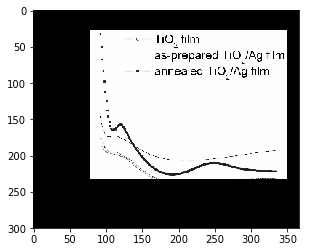

In [203]:
#Prueba de como queda segmentada la imagen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped_image = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
plt.imshow(cropped_image, cmap = 'gray')
plt.show()

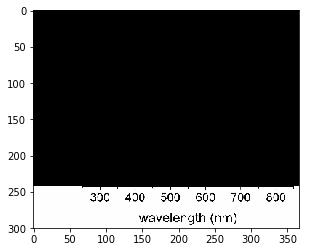

In [204]:
#Ahora se segmentará para que se detecte todo lo que esté debajo del eje X
n= 10
#columna, fila

region_of_interest_vertices = [
    (int(0), int(img_array.shape[0])),
    (int(0), int(ejex)),
    (int(img_array.shape[1]), int(ejex)),
    (int(img_array.shape[1]), int(img_array.shape[0]))]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
 


plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

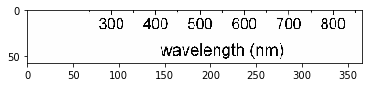

In [205]:
#Ahora se recortará para que se detecte todo lo que esté debajo del eje X

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = gray_image[ejex:img_array.shape[0], 0:img_array.shape[1]]

##Resizing the image
#scale_percent = 220 # percent of original size
#width = int(cropped_image_x.shape[1] * scale_percent / 100)
#height = int(cropped_image_x.shape[0] * scale_percent / 100)
#dim = (width, height)

plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

35
35


Text(0, 0.5, 'Promedio de los valores de esa fila')

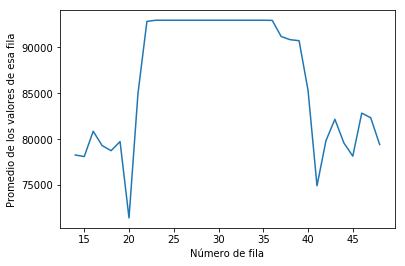

In [206]:
#Código para detectar el espacio de separación entre la leyenda del eje y los valores del eje

height = cropped_image_x.shape[0]
menor = height - height*0.75
mayor = height - height*0.15

means = []
file = []
for i in range(int(menor), int(mayor)):
    calc = np.sum(cropped_image_x[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}1
for key, value in zip(file, means):
    dict[key] = value
    
    
print(len(means))
print(len(file))
#valor = max(means)
#print(valor)
#def get_key(val): 
#    for key, value in dict.items(): 
#         if val == value: 
#             return key
#fila_new = get_key(valor)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


In [225]:
#Código para encontrar el punto medio entre ese espacio blanco de separación
import statistics
import heapq

lista_con_max = heapq.nlargest(3, means)
lista = []
for fila, suma in dict.items():
        for i in lista_con_max:
            if suma == i:
                lista.append(fila)
print(lista)
separacion_x = int(statistics.median(lista))
print(separacion_x)

[18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37]
27


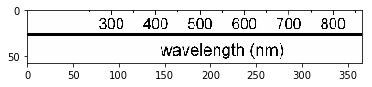

In [226]:
#Graficación de la línea de separación de los números y de la leyenda del eje X
if len(lista) <2:
    print("La imagen no tiene leyenda")

else:
    cropped_image_xcopy = cropped_image_x.copy()
    cv2.line(cropped_image_xcopy, (0,separacion_x), (img_array.shape[1],separacion_x), (0, 255, 0), 2)

    plt.imshow(cropped_image_xcopy, cmap = 'gray')
    plt.show()

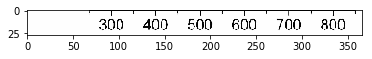

In [227]:
#Si el espacio es muy corto, significa que no hay leyenda en la imagen
if len(lista) <2:
    numbers = cropped_image_x

else:

    numbers = cropped_image_x[0:separacion, 0:img_array.shape[1]]
    
plt.imshow(numbers, cmap = 'gray')
plt.show()

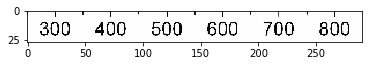

In [228]:
#Ahora específicamente solo los números
just_numbers = cropped_image_x[0:separacion, columna:columna_derecha]
plt.imshow(just_numbers, cmap = 'gray')
cv2.imwrite('./flip.png', just_numbers)
plt.show()

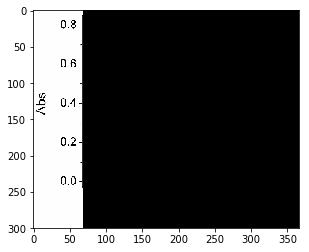

In [229]:
#Ahora se segmentará para que se detecte todo lo que esté a la izquierda del eje Y
n= 10
#columna, fila

region_of_interest_vertices = [
    (int(0), int(img_array.shape[0])),
    (int(0), int(0)),
    (int(columna), int(0)),
    (int(columna), int(img_array.shape[0]))]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_y = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
 


plt.imshow(cropped_image_y, cmap = 'gray')
plt.show()

35
35


Text(0, 0.5, 'Promedio de los valores de esa columna')

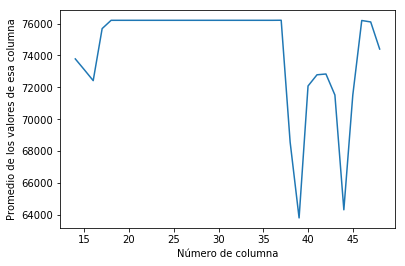

In [230]:
#Código para detectar el espacio de separación entre la leyenda del eje y los valores del eje

height = cropped_image_x.shape[0]
menor = height - height*0.75
mayor = height - height*0.15

means = []
file = []
for i in range(int(menor), int(mayor)):
    calc = np.sum(cropped_image_y[:,i])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(file, means):
    dict[key] = value
    
    
print(len(means))
print(len(file))
#valor = max(means)
#print(valor)
#def get_key(val): 
#    for key, value in dict.items(): 
#         if val == value: 
#             return key
#fila_new = get_key(valor)


plt.plot(file, means)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')


In [231]:
#Código para encontrar el punto medio entre ese espacio blanco de separación
import statistics
import heapq

lista_con_max = heapq.nlargest(3, means)
lista = []
for fila, suma in dict.items():
        for i in lista_con_max:
            if suma == i:
                lista.append(fila)
print(lista)
separacion_y = int(statistics.median(lista))
print(separacion_y)

[18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37]
27


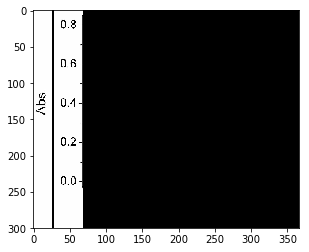

In [232]:
#Graficación de la línea de separación de los números y de la leyenda del eje X
if len(lista) <2:
    print("La imagen no tiene leyenda")

    #columna, fila
else:
    cropped_image_ycopy = cropped_image_y.copy()
    cv2.line(cropped_image_ycopy, (separacion_y, img_array.shape[0]), (separacion_y, 0), (0, 255, 0), 2)

    plt.imshow(cropped_image_ycopy, cmap = 'gray')
    plt.show()

In [211]:
#Dataframe con las predicciones hechas con la API de Google
import pandas as pd
unpickled_df = pd.read_pickle("C:/Users/Felipe/Downloads/dummy.pkl")
unpickled_df

,value,v1,v2,v3,v4,img_name
0,13-,"[29, 1]","[44, 1]","[44, 13]","[29, 13]",Mondal201357-Figure5-1.png
1,12-,"[29, 43]","[57, 43]","[57, 60]","[29, 60]",Mondal201357-Figure5-1.png
2,11,"[29, 88]","[42, 88]","[42, 100]","[29, 100]",Mondal201357-Figure5-1.png
3,10-,"[27, 129]","[48, 129]","[48, 146]","[27, 146]",Mondal201357-Figure5-1.png
4,8,"[37, 219]","[44, 219]","[44, 231]","[37, 231]",Mondal201357-Figure5-1.png
5,7wt%,"[426, 369]","[465, 370]","[465, 384]","[426, 383]",Mondal201357-Figure5-1.png
6,Owt%,"[92, 370]","[131, 370]","[131, 382]","[92, 382]",Mondal201357-Figure5-1.png
7,3wt%,"[203, 370]","[242, 370]","[242, 382]","[203, 382]",Mondal201357-Figure5-1.png
8,5wt%,"[315, 370]","[353, 370]","[353, 382]","[315, 382]",Mondal201357-Figure5-1.png
9,MMT,"[194, 399]","[230, 400]","[230, 413]","[194, 412]",Mondal201357-Figure5-1.png


In [212]:
name

'Zuo2013201-Figure1-1.png'

In [213]:
#Seleccionando los valores correspondientes a la imagen en cuestion
selection = unpickled_df[unpickled_df['img_name'] == name]
selection

,value,v1,v2,v3,v4,img_name
10340,0.8-,"[38, 14]","[67, 15]","[67, 26]","[38, 25]",Zuo2013201-Figure1-1.png
10341,"Tio,","[161, 33]","[205, 31]","[206, 50]","[162, 52]",Zuo2013201-Figure1-1.png
10342,film,"[204, 33]","[227, 32]","[228, 46]","[205, 47]",Zuo2013201-Figure1-1.png
10343,as-prepared,"[168, 56]","[253, 56]","[253, 70]","[168, 70]",Zuo2013201-Figure1-1.png
10344,"TiO,JAg","[260, 55]","[315, 55]","[315, 71]","[260, 71]",Zuo2013201-Figure1-1.png
10345,film,"[321, 56]","[345, 56]","[345, 67]","[321, 67]",Zuo2013201-Figure1-1.png
10346,annealed,"[168, 77]","[232, 78]","[232, 90]","[168, 89]",Zuo2013201-Figure1-1.png
10347,"TiO,/Ag","[239, 78]","[293, 79]","[293, 94]","[239, 93]",Zuo2013201-Figure1-1.png
10348,film,"[300, 77]","[324, 77]","[324, 89]","[300, 89]",Zuo2013201-Figure1-1.png
10349,0.6-,"[38, 64]","[68, 64]","[68, 80]","[38, 80]",Zuo2013201-Figure1-1.png


In [214]:
#Extrayendo los valores de los vertices del dataframe

#df['C'] = df['A'] + df['B'].apply(lambda x:x[1])
v1_ar = selection['v1'].apply(lambda x:x[0]).values
v2_ar = selection['v2'].apply(lambda x:x[0]).values
v3_ar = selection['v3'].apply(lambda x:x[1]).values
v2_2 = selection['v2'].apply(lambda x:x[1]).values

In [215]:
selection['v2'].apply(lambda x:x[1]).values[0]

15

In [216]:
#Calculando el centroide de cada vertice
centroides = []
for i in range(len(v1_ar)):
    centroide_x = (v2_ar[i] - v1_ar[i])/2 + v1_ar[i]
    centroide_y = (v3_ar[i] - v2_2[i])/2 + v2_2[i] 
    centroides.append([centroide_x, centroide_y])

In [218]:
centroides

[[52.5, 20.5],
 [183.0, 40.5],
 [215.5, 39.0],
 [210.5, 63.0],
 [287.5, 63.0],
 [333.0, 61.5],
 [200.0, 84.0],
 [266.0, 86.5],
 [312.0, 83.0],
 [53.0, 72.0],
 [33.5, 126.5],
 [52.0, 126.5],
 [53.0, 180.0],
 [51.5, 234.5],
 [91.5, 257.5],
 [140.0, 257.0],
 [188.5, 257.5],
 [236.5, 257.5],
 [285.5, 257.5],
 [333.5, 257.5],
 [191.0, 287.0],
 [261.5, 287.0]]

In [233]:
#Valores límites

print(ejex) #Es el valor en y (empezando desde arriba de la imagen)
print(columna) #Es el valor en x (empezando desde la parte izquierda)
print(separacion_x)
print(separacion_y)

242
68
27
27


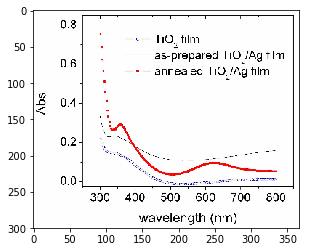

In [234]:
plt.imshow(img_original) # graph it
plt.show()

In [237]:
centroides[0]

[52.5, 20.5]

In [254]:
len(centroides)

22

In [239]:
#Determinando el rol según los valores límites

#Mis variables son: ejex, columna, columna_derecha, fila_arriba
rol = []
for i in range(0, len(centroides)):
    if centroides[i][0] <= separacion_y:
        rol.append('leyenda_y')
    if centroides[i][0] < columna and centroides[i][0] >= separacion_y:
        rol.append('valor_y')
    if centroides[i][1] >= separacion_x + ejex:
        rol.append('leyenda_x')
    if centroides[i][1] >= ejex and centroides[i][1] < separacion_x + ejex:
        rol.append('valor_x')

In [240]:
rol

['valor_y',
 'valor_y',
 'valor_y',
 'valor_y',
 'valor_y',
 'valor_y',
 'valor_x',
 'valor_x',
 'valor_x',
 'valor_x',
 'valor_x',
 'valor_x',
 'leyenda_x',
 'leyenda_x']

In [255]:
centroides_x = []
for i in range(len(centroides)):
    centroides_x.append(centroides[i][0])
    
centroides_y = []
for i in range(len(centroides)):
    centroides_y.append(centroides[i][1])

centroides_x_pd = pd.Series(centroides_x) 
centroides_y_pd = pd.Series(centroides_y)
rol_pd = pd.Series(rol)

df = pd.concat([centroides_x_pd,
        centroides_y_pd,
        rol_pd], axis=1)

df.columns=['centroides_x', 'centroides_y', 'rol']
print(df)

    centroides_x  centroides_y        rol
0           52.5          20.5    valor_y
1          183.0          40.5    valor_y
2          215.5          39.0    valor_y
3          210.5          63.0    valor_y
4          287.5          63.0    valor_y
5          333.0          61.5    valor_y
6          200.0          84.0    valor_x
7          266.0          86.5    valor_x
8          312.0          83.0    valor_x
9           53.0          72.0    valor_x
10          33.5         126.5    valor_x
11          52.0         126.5    valor_x
12          53.0         180.0  leyenda_x
13          51.5         234.5  leyenda_x
14          91.5         257.5        NaN
15         140.0         257.0        NaN
16         188.5         257.5        NaN
17         236.5         257.5        NaN
18         285.5         257.5        NaN
19         333.5         257.5        NaN
20         191.0         287.0        NaN
21         261.5         287.0        NaN


In [256]:
#Creando un solo dataframe
df_final = selection.join(df.set_index(selection.index))
df_final

,value,v1,v2,v3,v4,img_name,centroides_x,centroides_y,rol
10340,0.8-,"[38, 14]","[67, 15]","[67, 26]","[38, 25]",Zuo2013201-Figure1-1.png,52.5,20.5,valor_y
10341,"Tio,","[161, 33]","[205, 31]","[206, 50]","[162, 52]",Zuo2013201-Figure1-1.png,183.0,40.5,valor_y
10342,film,"[204, 33]","[227, 32]","[228, 46]","[205, 47]",Zuo2013201-Figure1-1.png,215.5,39.0,valor_y
10343,as-prepared,"[168, 56]","[253, 56]","[253, 70]","[168, 70]",Zuo2013201-Figure1-1.png,210.5,63.0,valor_y
10344,"TiO,JAg","[260, 55]","[315, 55]","[315, 71]","[260, 71]",Zuo2013201-Figure1-1.png,287.5,63.0,valor_y
10345,film,"[321, 56]","[345, 56]","[345, 67]","[321, 67]",Zuo2013201-Figure1-1.png,333.0,61.5,valor_y
10346,annealed,"[168, 77]","[232, 78]","[232, 90]","[168, 89]",Zuo2013201-Figure1-1.png,200.0,84.0,valor_x
10347,"TiO,/Ag","[239, 78]","[293, 79]","[293, 94]","[239, 93]",Zuo2013201-Figure1-1.png,266.0,86.5,valor_x
10348,film,"[300, 77]","[324, 77]","[324, 89]","[300, 89]",Zuo2013201-Figure1-1.png,312.0,83.0,valor_x
10349,0.6-,"[38, 64]","[68, 64]","[68, 80]","[38, 80]",Zuo2013201-Figure1-1.png,53.0,72.0,valor_x
